# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Segmentación de Clientes
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1TlILFEVGZHessjmKkUMWL4NHlZ0DcHQb)

![alt text](https://drive.google.com/uc?id=1KaI1zjhARTFAs6X6VwqdsYZecd5EYDMw)

![alt text](https://drive.google.com/uc?id=1Q46sKROZf7jqKus0TfL7agQ5ZnzECiws)

![alt text](https://drive.google.com/uc?id=1zJX7y-J2jhIL17Lh7OroOZvrlblI0u1s)

![alt text](https://drive.google.com/uc?id=1L03HfNPXpLdLlKHk_I6FIj_ahPCuPL0S)

![alt text](https://drive.google.com/uc?id=1i-OPyUph2PGuuZ5FtN0hGX3BkEXCAQNM)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TAREA #2: IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [28]:
df = pd.read_csv("Marketing_data.csv")

## Campos del dataset:

 * **CUSTID:** Identificación del titular de la tarjeta de crédito
 * **BALANCE:** Cantidad de saldo que queda en la cuenta del cliente para hacer compras
 * **BALANCE_FREQUENCY:** Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
 * **PURCHASES:** Cantidad de compras realizadas desde la cuenta
 * **ONEOFFPURCHASES:** Importe máximo de compra realizado en una sola vez
 * **INSTALLMENTS_PURCHASES: **Importe de la compra realizada en cuotas
 * **CASH_ADVANCE:** Anticipo otorgado al usuario
 * **PURCHASES_FREQUENCY:** frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
 * **PURCHASES_FREQUENCY:** Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
 * **ONEOFF_PURCHASES_FREQUENCY:** Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
 * **PURCHASES_INSTALLMENTS_FREQUENCY:** Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
 * **CASH_ADVANCE_FREQUENCY:** con qué frecuencia el gasto se paga por adelantado
 * **CASH_ADVANCE_TRX:** número de transacciones realizadas con "Efectivo por adelantado"
 * **PURCHASES_TRX:** número de transacciones de compras realizadas
 * **CREDIT_LIMIT:** límite de tarjeta de crédito para el usuario
 * **PAYMENTS:** Número de pagos realizados por el usuario
 * **MINIMUM_PAYMENTS:** cantidad mínima de pagos realizados por el usuario
 * **PRC_FULL_PAYMENT:** porcentaje del pago total pagado por el usuario
 * **TENURE:** Años que el usuario lleva usando el servicio de tarjeta de crédito

In [29]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [31]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



* El balance medio es $1564\$$
* La frecuencia del balance se actualiza bastante a menudo, en promedio ~0.9
* El promedio de las compras es $1000\$$
* El importe máximo de compra no recurrente es en promedio ~$600\$$
* El promedio de la frecuencia de las compras está cerca de 0.5
* El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
* El promedio del límite de crédito es ~ 4500
* El porcentaje de pago completo es 15%
* Los clientes llevan de promedio en el servicio 11 años

### Vamos a investigar quien ha hecho una compra de $\$40761$ de golpe:

In [32]:
df[df["ONEOFF_PURCHASES"] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


**Para un cliente con bastante poder adquisitivo que apenas pide prestado dinero al banco, y que realiza bastantes compras con tarjeta.**

### Vamos a ver quien pagó por anticipado $\$47137$:

In [35]:
df['CASH_ADVANCE'].max()

47137.211760000006

In [36]:
# Vamos a ver quien pago por anticipado $47137!
# Este cliente hizo un total de 123 transacciones por adelantado!!
# Nunca paga sus compras completamente con la tarjeta

df[df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


**Este cliente hizo un total de `123` transacciones por adelantado y nunca paga sus compras completamente con la tarjeta**

# TAREA #3: VISUALIZACIÓN DEL DATASET

### Comprobamos a ver si tenemos valores desconocidos:

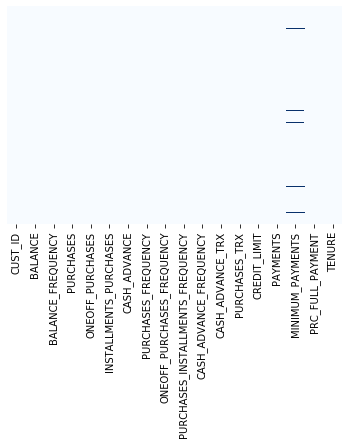

In [37]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [38]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Completamos los datos faltantes con el promedio del campo 'MINIMUM_PAYMENT':**

In [40]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

**Rellenemaos los datos faltantes con el promedio del campo 'CREDIT_LIMIT':**

In [41]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

**Comprobamos si tenemos entradas duplicadas en nuestros datos:**

In [42]:
# Varifiquemos si tenemos entradas duplicadas en nuestros datos 
df.duplicated().sum()

0

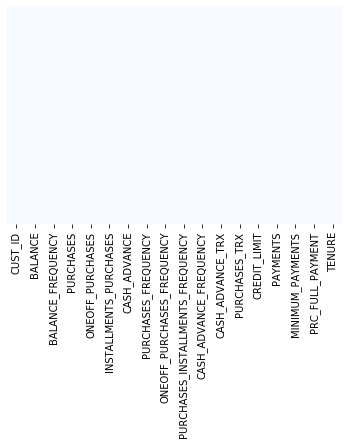

In [43]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

### Podemos deshacernos del campo Customer ID ya que no nos sirve para nada:

In [44]:
df.drop("CUST_ID", axis = 1, inplace=True)

In [46]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [47]:
n = len(df.columns)
n

17

In [48]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

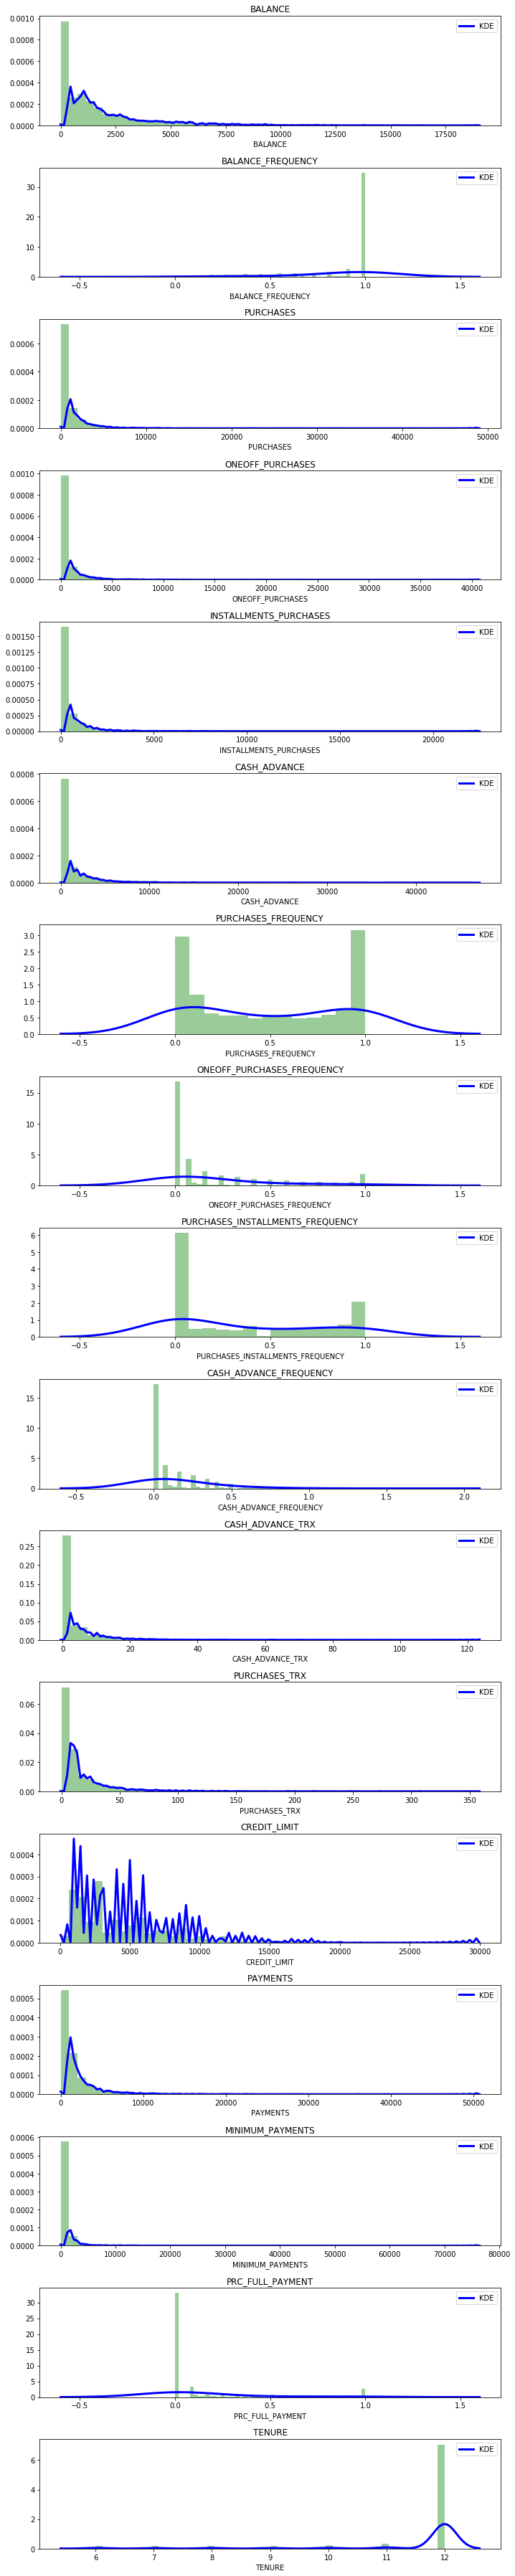

In [49]:
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua. 
# KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua. 

# El balance promedio es  $1500
# 'Balance_Frequency' para muchos usuarios se actualiza muy frecuentemente ~1
# Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes
# Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' la gran mayoría de usuarios no pagan todo de golpe ni a plazos
# Muy pocos clientes pagan su deuda al completo 'PRC_FULL_PAYMENT'~0
# El promedio del límite del crédito está entorno de los $4500
# La mayoría de clientes llevan ~11 años usando el servicio

plt.figure(figsize = (10, 50))
for i in range(n):
    plt.subplot(n, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE", 'bw': 0.2}, hist_kws={"color": "g"})
    plt.title(df.columns[i])

plt.tight_layout()

### Correleación entre las variables:

In [50]:
correlations = df.corr()

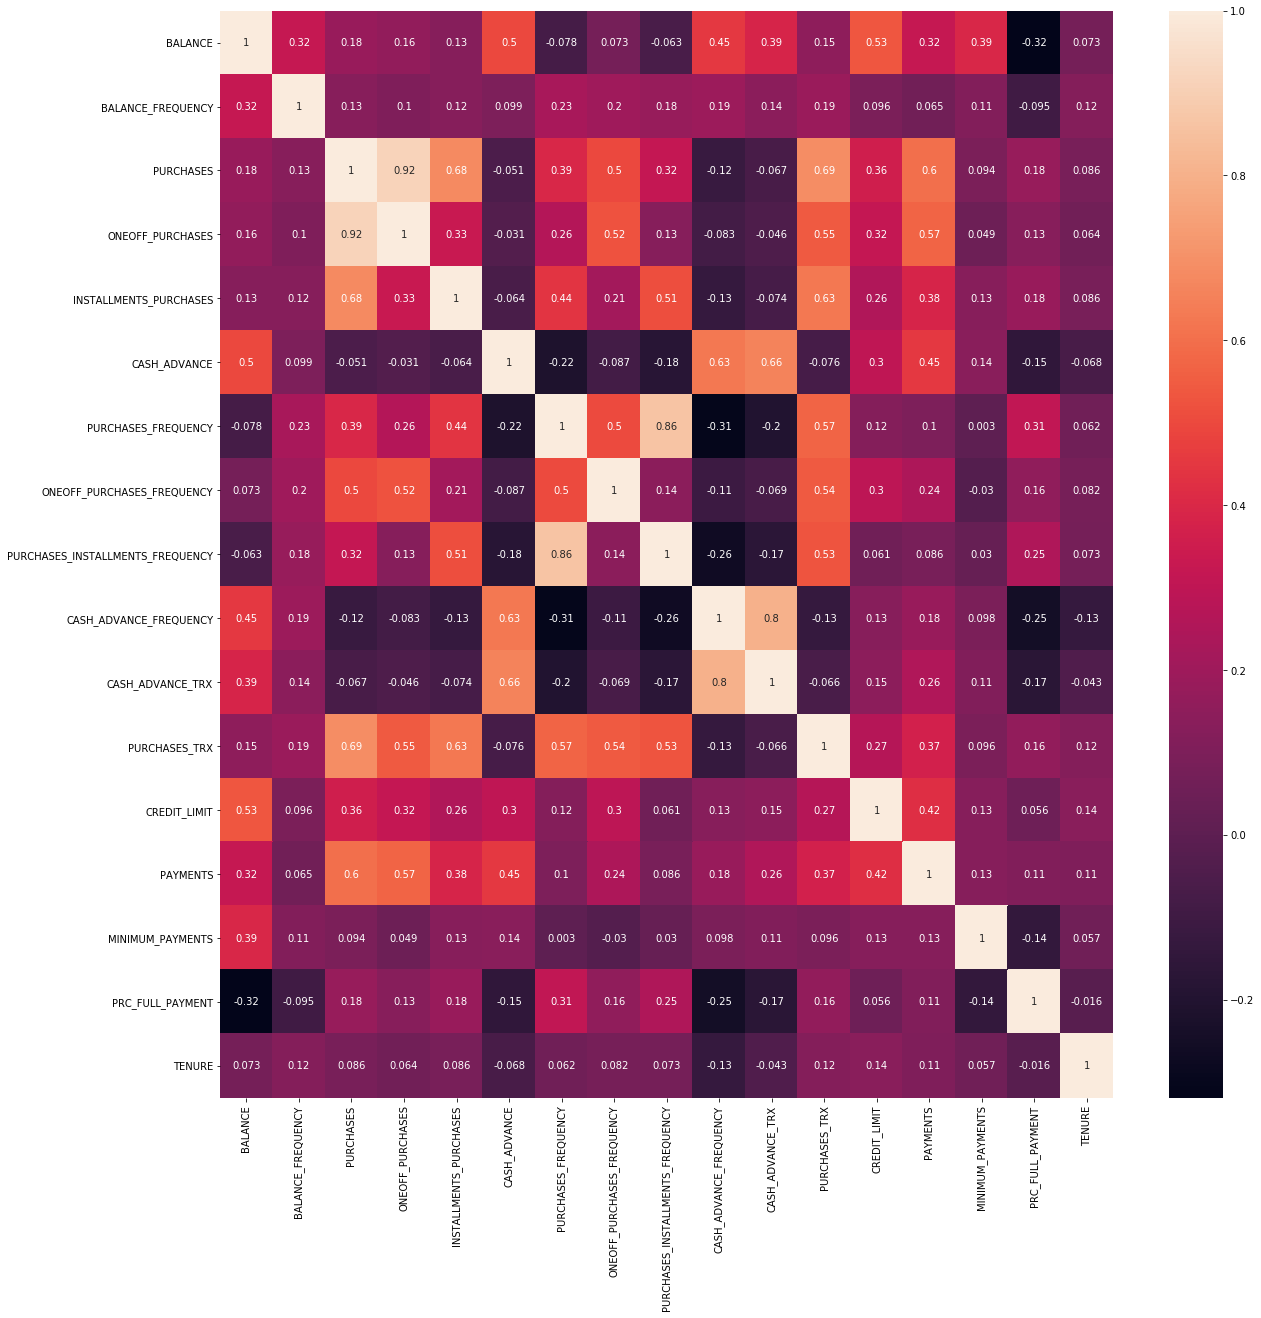

In [51]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

* Hay correlación entre el número de compras *(PURCHASES)* con las compras de un solo pago *(ONEOFF_PURCHASES)* y las compras aplazadas *(INSTALMENT_PURCHASES)*.
* También se puede ver una tendencia entre *PURCHASES* con *CREDIT_LIMIT* y *PAYMENTS*.
* Correlación alta entre *PURCHASES_FREQUENCY* y *PURCHASES_INSTALLMENT_FREQUENCY*.

# TAREA #4: ENTENDER LA TEORÍA DETRÁS DE K-MEANS

![alt text](https://drive.google.com/uc?id=1T2vAOTCInx9l2S9b9H5xm-__h-RLRY5s)

![alt text](https://drive.google.com/uc?id=1eXSerp2FQpxhAa355hKeVT0-tY94ixsw)

![alt text](https://drive.google.com/uc?id=1D12cmll79HCx_Xbt3PSq51PnytJ7DhSr)

![alt text](https://drive.google.com/uc?id=1Syuco6pZ410oP6KbfgCH18s09eB4Hd2H)

![alt text](https://drive.google.com/uc?id=1DQ4KUV66YG-xnZ4xorQFgtkx5EbE2GLI)

![alt text](https://drive.google.com/uc?id=1LzWnRt2w1bLUBGJ7tRK-b4Xudbx54H3D)

![alt text](https://drive.google.com/uc?id=1orzdGxbZPiWlLZcI7EKHAmhnz7T41cV_)

![alt text](https://drive.google.com/uc?id=1ITLmp2XTCUFIM-BPpDWOYmfjxENxywer)

# TAREA #5: ENCONTRAR EL NÚMERO ÓPTIMO DE CLISTERS UTILIZANDO EL MÉTODO DEL CODO

- El método del codo es un método heurístico de interpretación y validación de la coherencia dentro del análisis de clustering diseñado para ayudar a encontrar el número apropiado de clusters en un conjunto de datos.
- Si el gráfico de líneas se parece a un brazo, entonces el "codo" en el brazo es el valor de k que es el mejor.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

### Empecemos por escalar primero el dataset para que ninguna variable predomine:

In [52]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [53]:
df_scaled.shape

(8950, 17)

In [54]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

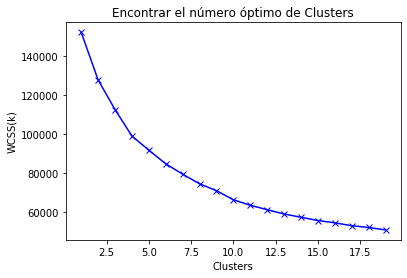

In [55]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_) #WCSS


plt.plot(range_values, scores_1, 'bx-')
plt.title("Encontrar el número óptimo de Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()


* Con el gráfico podemos ver que en 4 clusters es donde se forma el codo de la curva.
* Los valores no se reducen a una forma lineal hasta el 8º cluster. 
* Seleccionamos el un número de clusters igual a 8.

# TAREA #6: APLICAR EL MÉTODO DE K-MEANS

In [67]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_
labels #nos indica el cluster de cada observación

array([4, 1, 6, ..., 3, 3, 3], dtype=int32)

In [68]:
kmeans.cluster_centers_.shape #vemos que tenemos 8 baricentros con las 17 variables(features)

(8, 17)

In [69]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.366639,0.333155,-0.038243,-0.244205,0.358036,-0.363598,0.991214,-0.386909,1.206355,-0.475154,-0.361158,0.187123,-0.260825,-0.217616,-0.045775,0.315794,0.257381
1,1.690200,0.396003,-0.219127,-0.157223,-0.229345,2.020153,-0.480727,-0.214389,-0.417038,1.925066,1.939912,-0.268180,1.027024,0.808261,0.528696,-0.395008,0.069894
2,0.919935,0.467655,2.254491,1.721116,2.168756,-0.193346,1.160567,1.554826,1.246341,-0.309467,-0.209799,2.781901,1.225240,1.283915,0.566182,0.288329,0.334056
3,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
4,0.016413,0.403761,-0.361809,-0.247128,-0.401361,-0.090875,-0.865729,-0.409691,-0.757415,0.109975,-0.024866,-0.486546,-0.306801,-0.249651,-0.009637,-0.456995,0.272672
5,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
6,-0.162328,0.391951,0.464331,0.607019,-0.017446,-0.333376,0.943253,1.878523,0.089283,-0.407854,-0.323151,0.529205,0.383061,0.094333,-0.162067,0.408476,0.261680
7,-0.701163,-2.144787,-0.311233,-0.235823,-0.302542,-0.319756,-0.557150,-0.445187,-0.440134,-0.520622,-0.376063,-0.419936,-0.175963,-0.192408,-0.256478,0.283762,0.199336


### Para entender mejor estos valores vamos a aplicar una transformación inversa del escalado:

In [70]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,801.347031,0.956192,921.498712,187.107663,734.835246,216.389570,0.888173,0.087035,0.843874,0.040061,0.784187,19.361014,3545.460071,1103.167378,757.529897,0.246079,11.861760
1,5082.483731,0.971080,535.035681,331.479330,203.673753,5215.225625,0.297412,0.138501,0.198696,0.520370,16.487298,8.043880,8231.183078,4072.979303,2096.311415,0.038182,11.610855
2,3479.242725,0.988054,5819.959145,3449.137221,2372.247102,573.415653,0.956142,0.666292,0.859765,0.073217,1.817102,83.857482,8952.375297,5449.952679,2183.670969,0.238046,11.964371
3,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
4,1598.637446,0.972918,230.195050,182.255307,48.121884,788.301965,0.142892,0.080239,0.063421,0.157151,3.079131,2.616121,3378.180591,1010.429827,841.748192,0.020051,11.882223
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,1226.602717,0.970120,1995.255254,1599.964020,395.291234,279.765827,0.868923,0.762857,0.399921,0.053528,1.043557,27.863884,5888.182643,2006.230018,486.516117,0.273187,11.867514
7,105.063837,0.369191,338.250830,201.019898,137.482244,308.328143,0.266740,0.069650,0.189517,0.030962,0.682472,4.271804,3854.224762,1176.141747,266.495312,0.236710,11.784081


* **Primer Cluster de Clientes (Transactors):** Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero, Clúster con el saldo más bajo (`$104`) y anticipo en efectivo (`$303`). Porcentaje de pago completo = 23%.
* **Segundo Cluster de Clientes (Revolvers):** que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto (`$ 5000`) y anticipo en efectivo (`~$5000), baja frecuencia de compra, alta frecuencia de anticipo en efectivo (`0.5`), transacciones de anticipo en efectivo alto (`16`) y bajo porcentaje de pago (3%).
* **Tercer Cluster de Clientes (VIP/Prime):** límite de crédito alto `$16K` y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto.
* **Cuarto Cluster de Clientes (low tenure):** Son clientes con baja antigüedad (7 años), saldo bajo.

In [71]:
labels.shape

(8950,)

In [72]:
labels.min()

0

In [73]:
labels.max()

7

También se pueden hacer predicciones:

In [74]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([7, 3, 2, ..., 4, 4, 4], dtype=int32)

### Concatenamos las etiquetas de los clusters con el dataset original para ver a que cluster pertenece cada observación: 

In [75]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


**Visualizamos histogramas para cada cluster:**

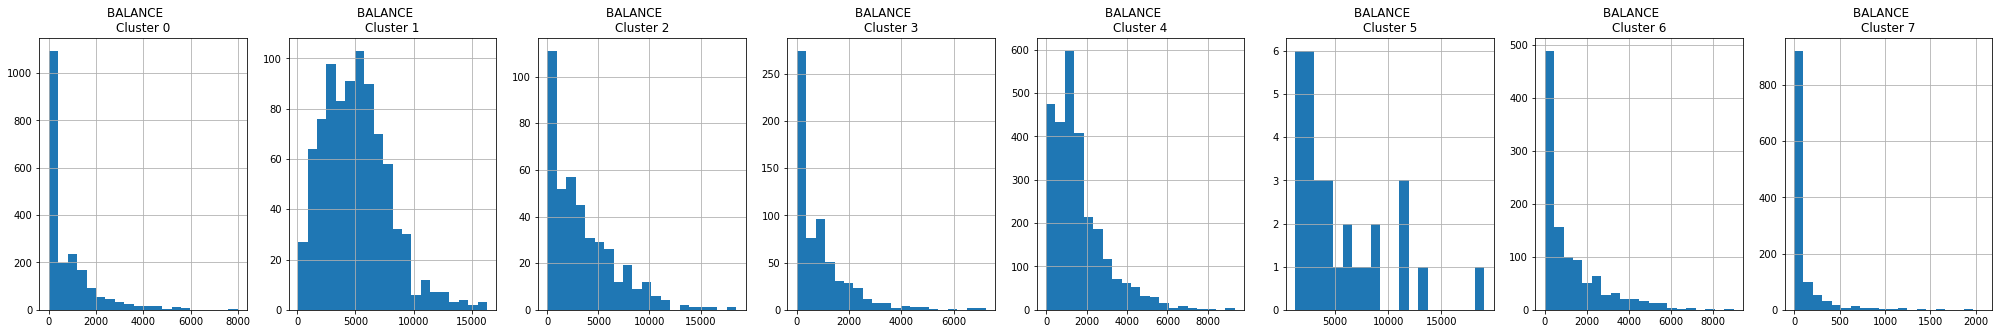

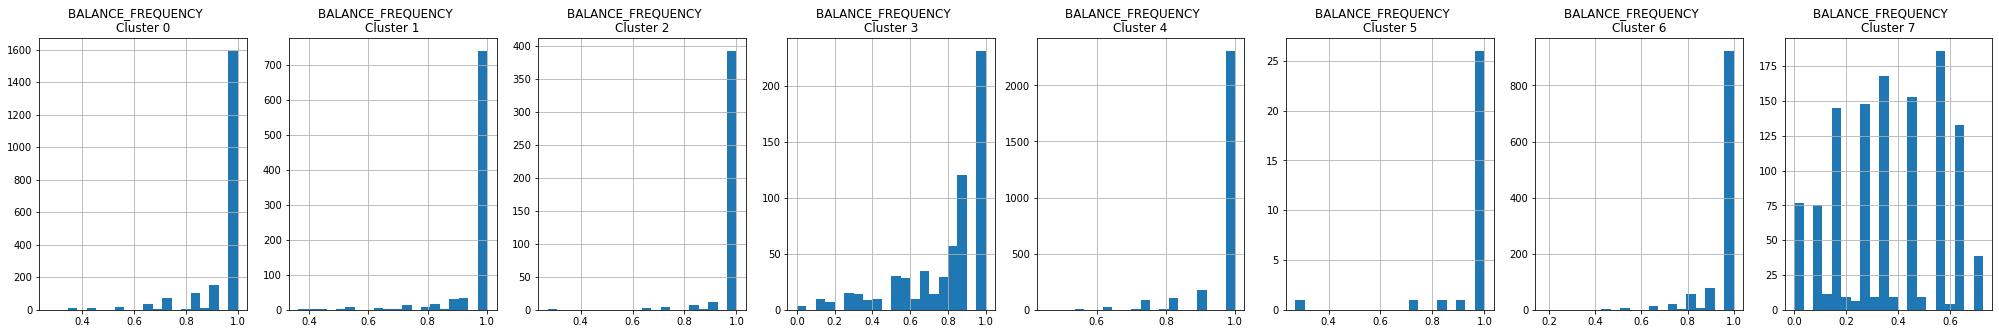

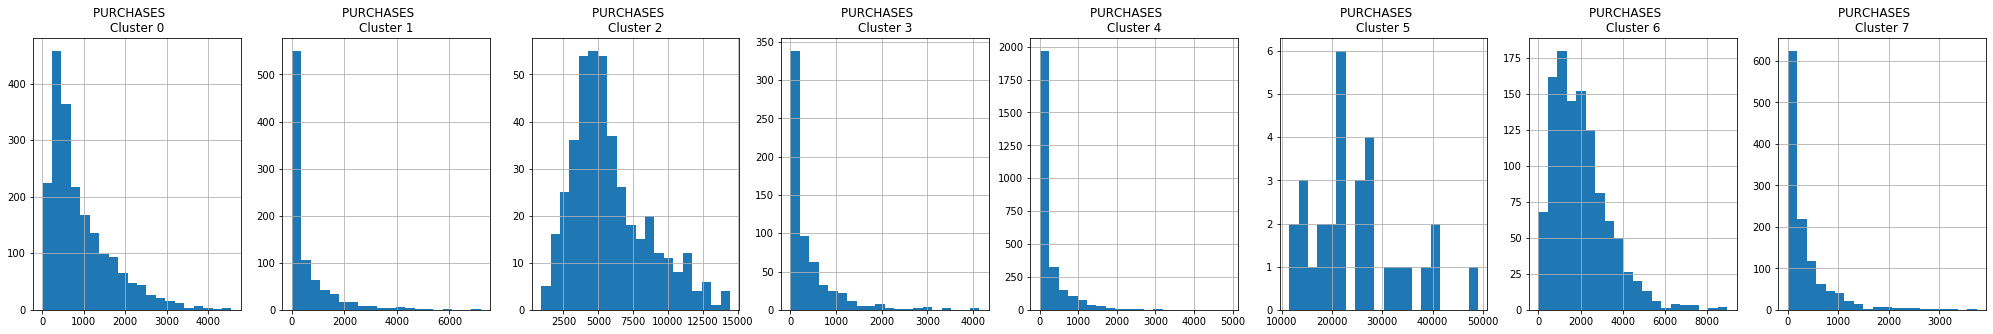

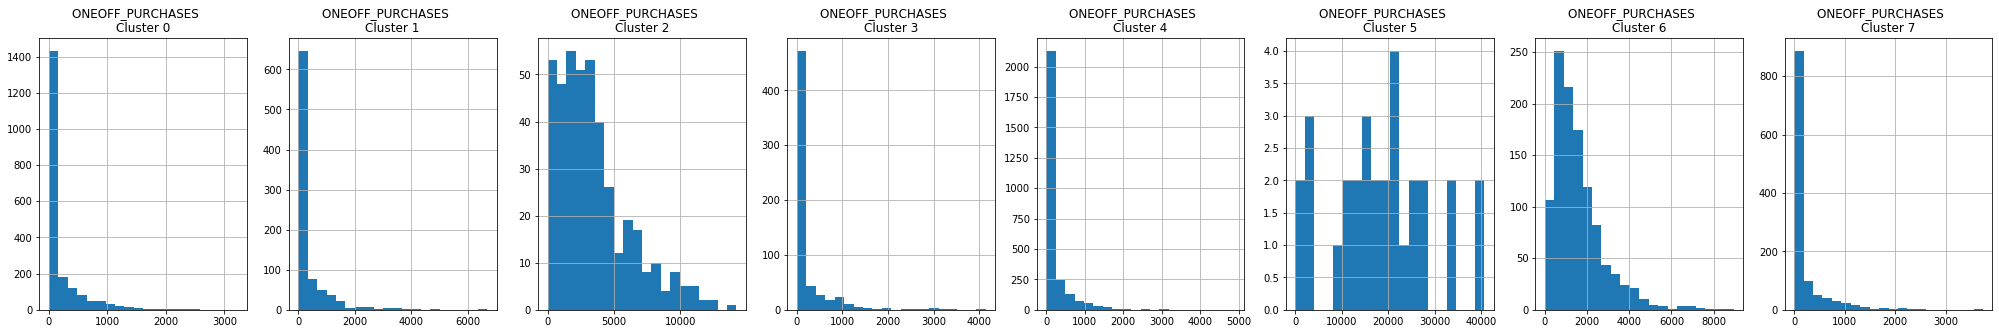

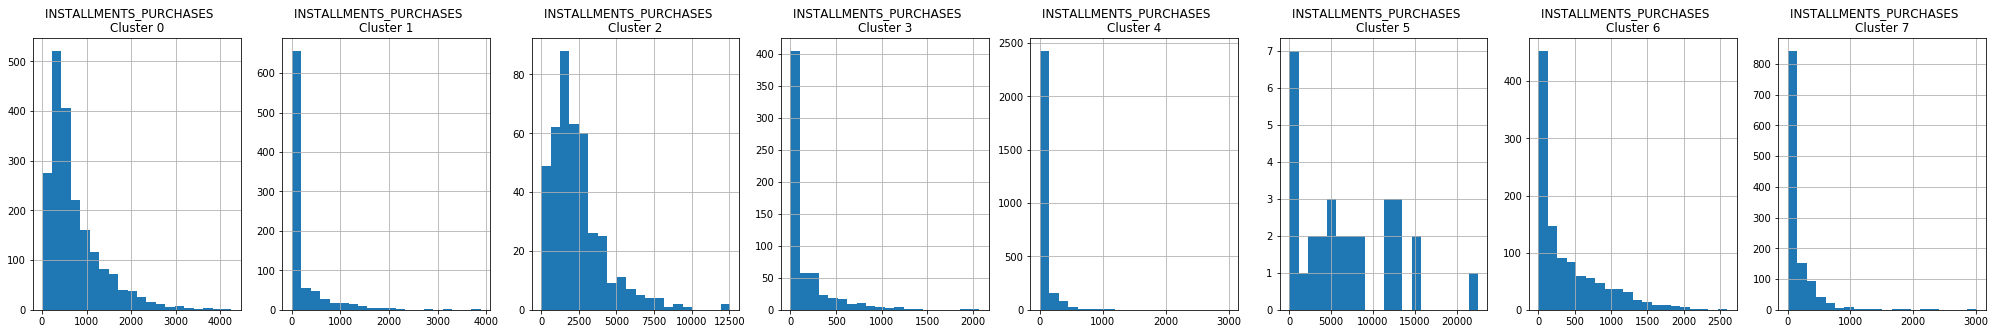

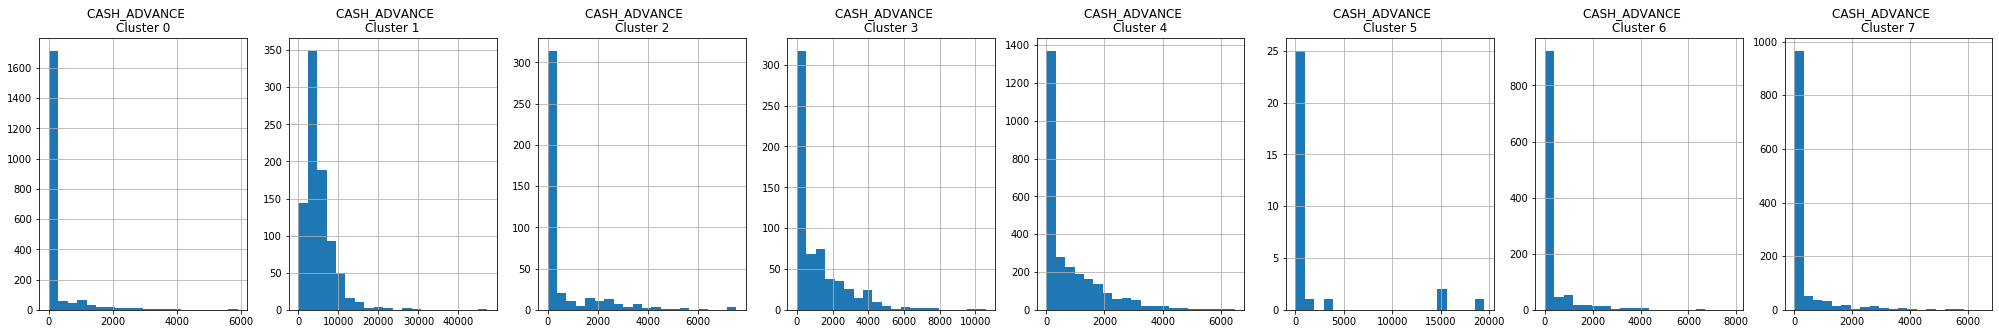

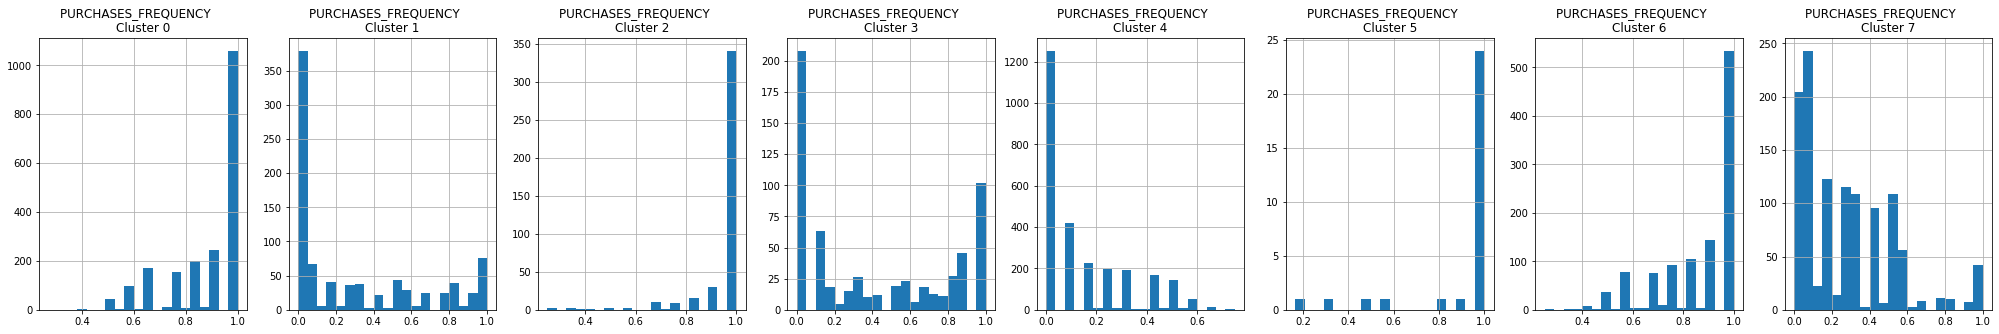

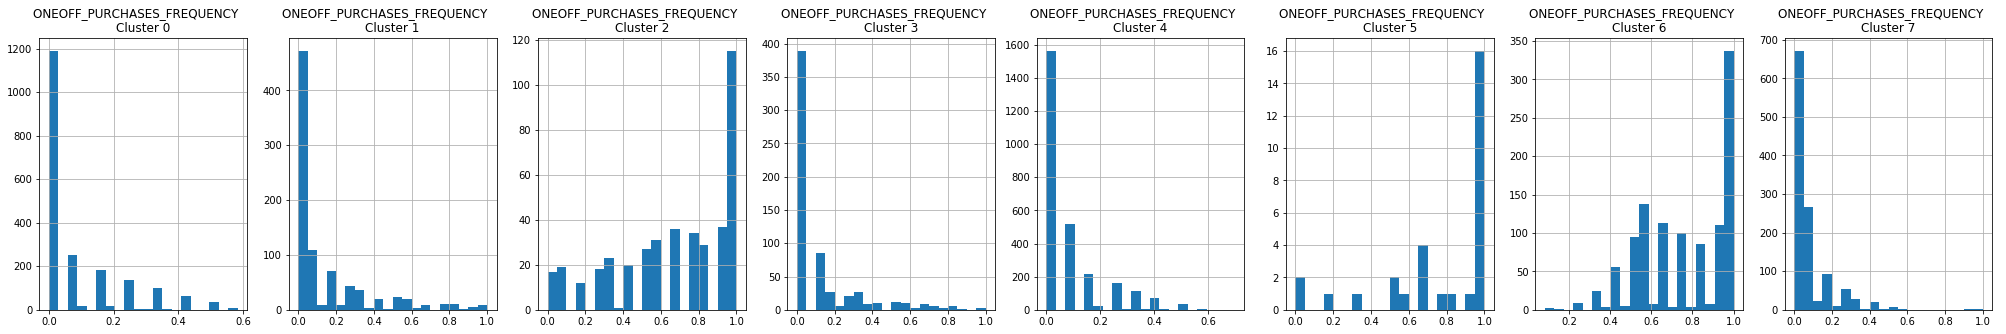

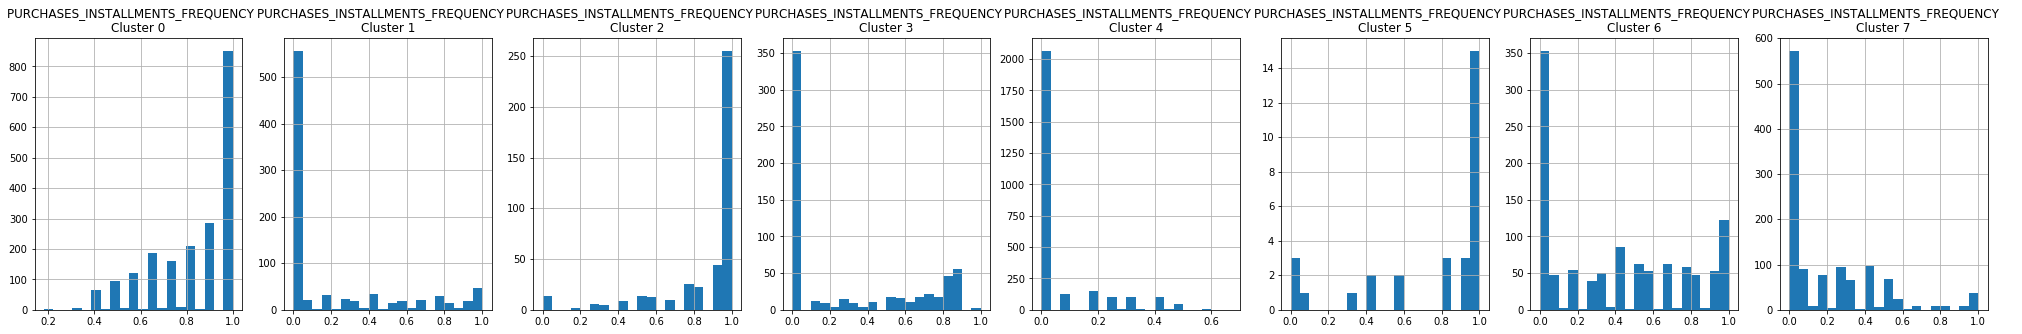

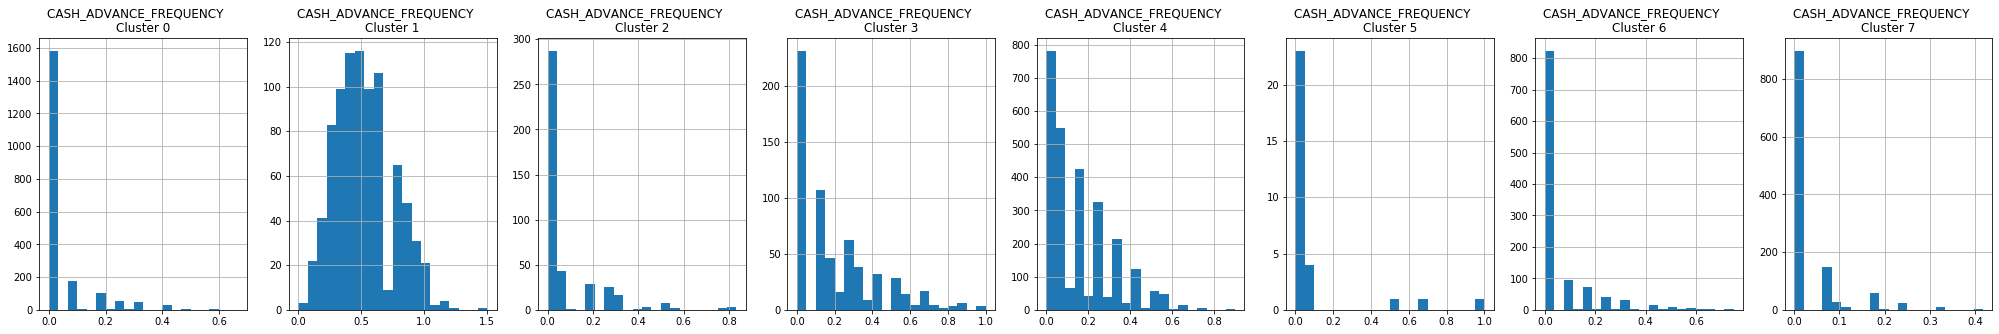

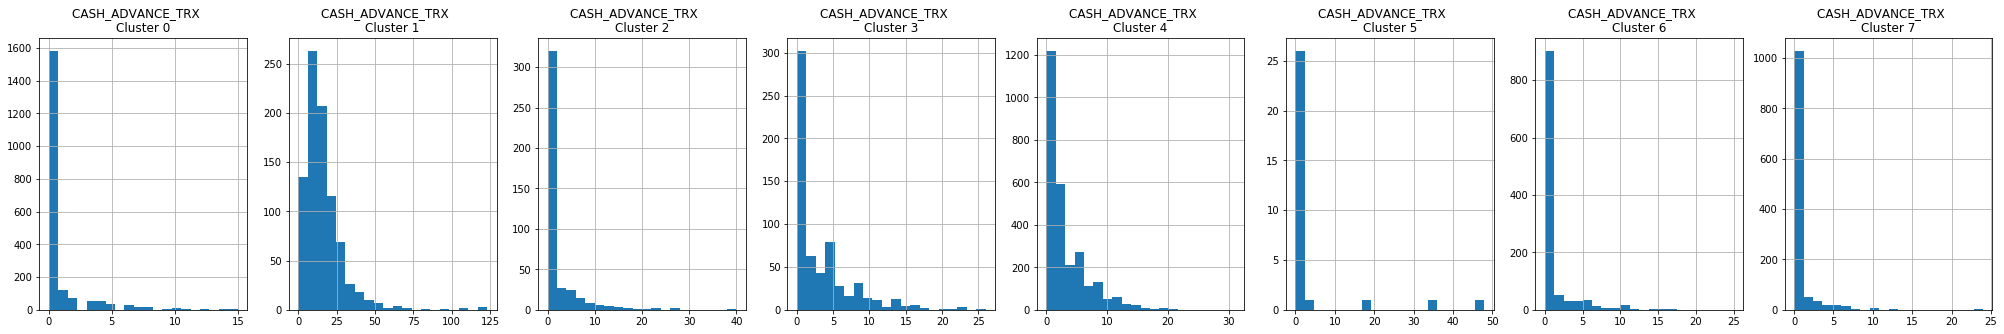

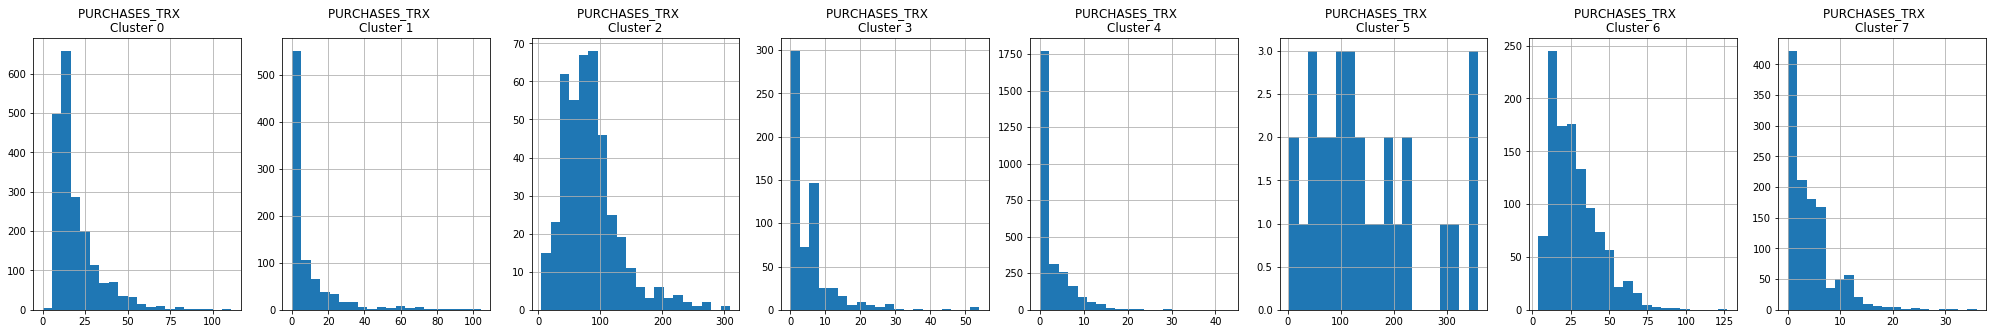

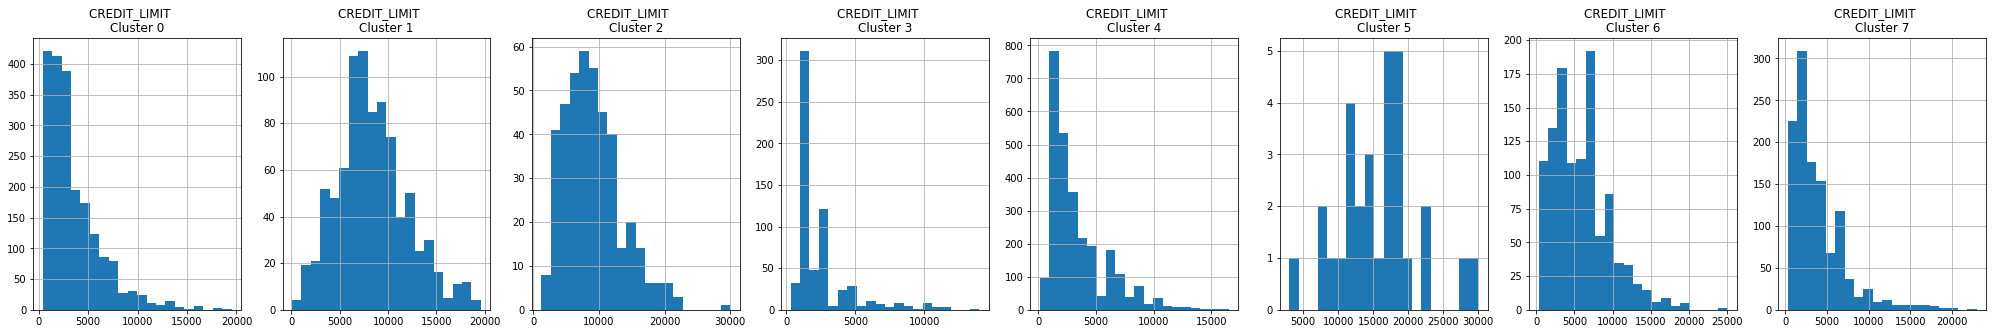

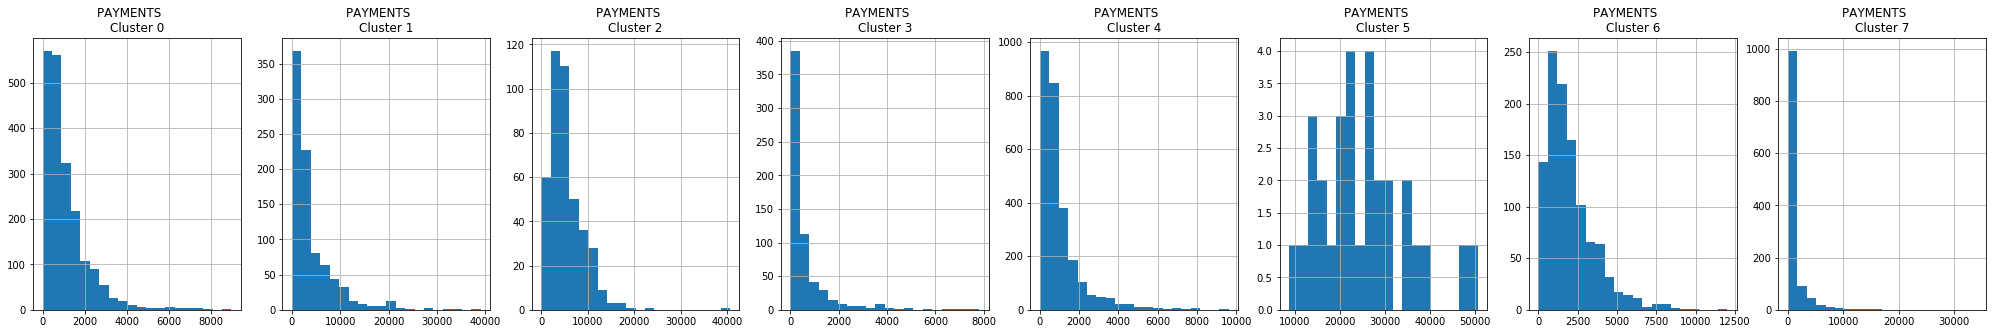

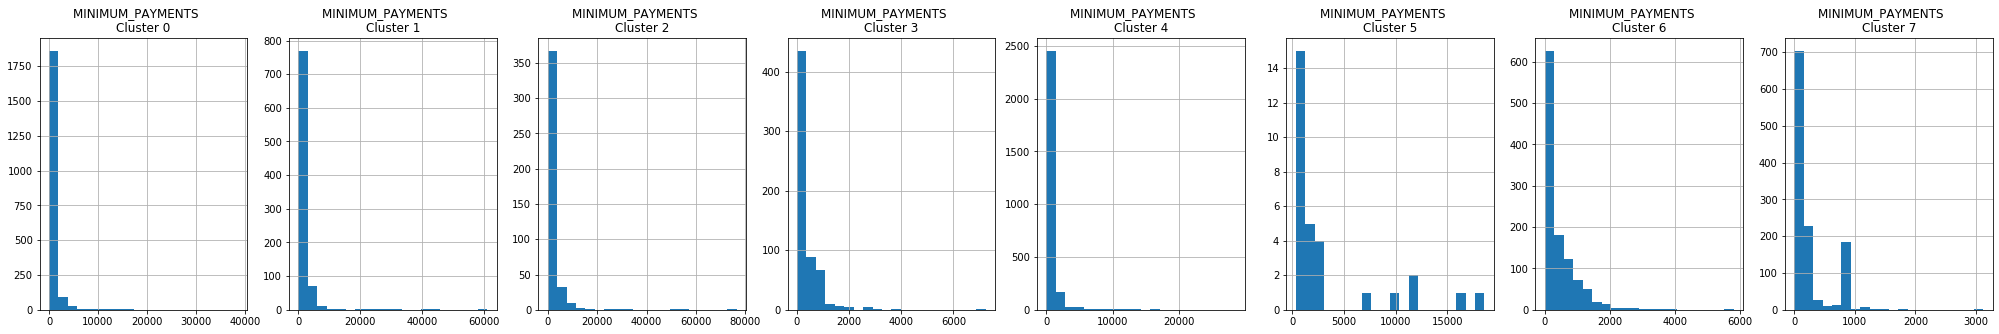

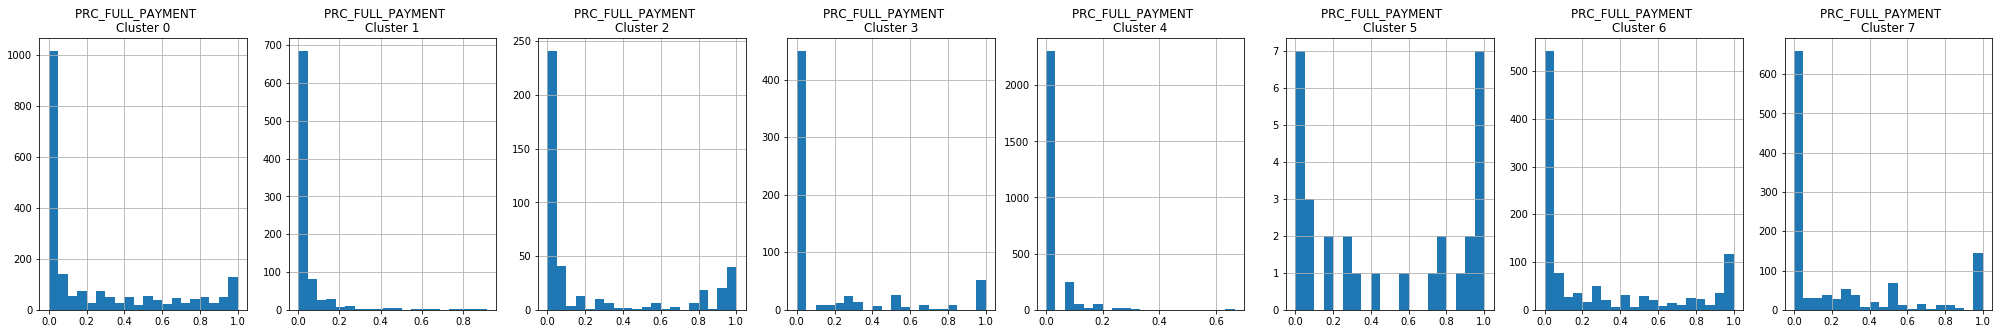

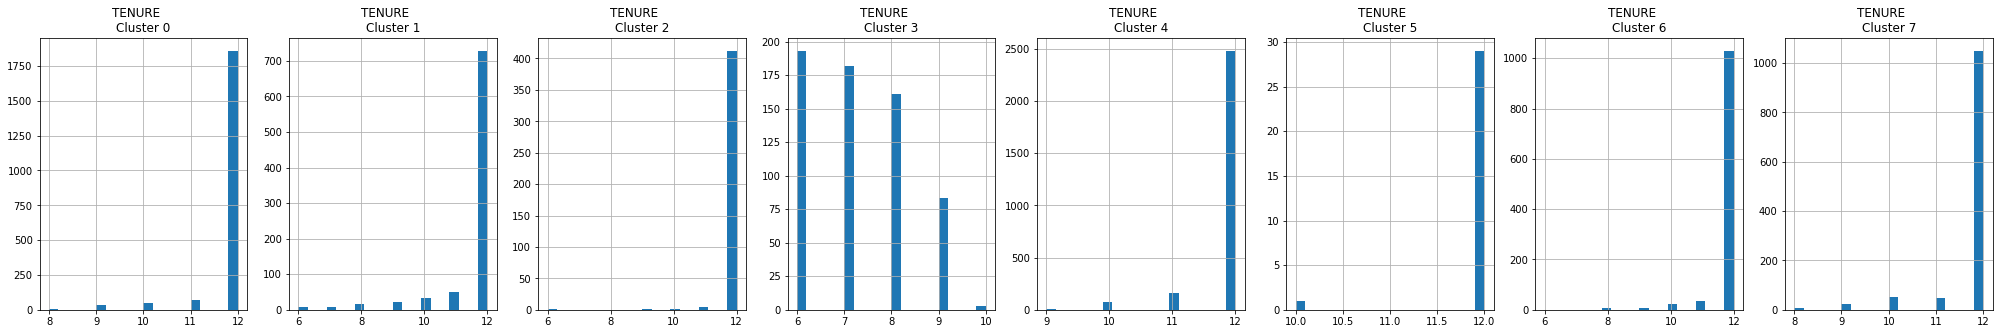

In [76]:
# Visualizamos histogramas para cada cluster 
for i in df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = df_cluster[df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {}'.format(i, j))
    plt.show()

# TAREA 7: APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS 

![alt text](https://drive.google.com/uc?id=17b_4GsvzJmWt9cnPOcgSGmEelagGSbtL)

In [ ]:
# Obtenemos las componentes principales
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp


In [ ]:
# Creamos un dataframe con las dos componentes 
pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2"])
pca_df.head()



In [ ]:
# Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)

pca_df.head()


In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette = ["red", "green", "blue", "pink", "yellow", "gray", "purple", "black"])
plt.show()







# TAREA #8: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE LOS AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1kY4Ol3OvDd4IaFdrGXB8s-vAa1bhsT6V)

![alt text](https://drive.google.com/uc?id=1qtSiLgN_ZYWV_SPD79xpiapkbHxNmqvb)

![alt text](https://drive.google.com/uc?id=13sf_hXzpb2_bctB5EF7w-pXDV_72J95_)

# TAREA #9: APLICAR LOS AUTOENCODERS (REDUCIR LA DIMENSIÓN DE LOS DATOS CON LOS AUTOENCODERS)

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape = (17, ))

# Glorot normal inicializador (Xavier normal initializer) tomar muestras aleatorias de una distribución normal truncada

x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)


autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [ ]:
creditcard_df_scaled.shape

In [ ]:
autoencoder.summary()

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs = 25, verbose = 1)

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
pred = encoder.predict(creditcard_df_scaled)

In [ ]:
pred.shape

In [ ]:
scores_2 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)


plt.plot(range_values, scores_2, 'bx-')
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

In [ ]:
plt.plot(range_values, scores_1, 'bx-', color = "r")
plt.plot(range_values, scores_2, 'bx-', color = "g")


In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()

In [ ]:
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = princ_comp, columns=["pca1", "pca2"])
pca_df.head()

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis = 1)
pca_df

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y = "pca2", hue="cluster", data = pca_df, palette=["red", "green", "blue", "yellow"])
plt.show()

# ¡EXCELENTE TRABAJO! PUEDES ESTAR ORGULLOSO DE TUS HABILIDADES RECIEN ADQUIRIDAS